# Iniciación en Python con Aplicaciones en Aceración (module 03)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r
import src.ev as ev

In [2]:
random_state = 42

# 1. Contexto Metalúrgico

La estadística de valores extremos es una rama de la estadística que se interesa en estimar la probabilidad de que ocurra un evento más extremo que cualquier evento observado previamente.

Dentro del contexto de calidad metalúrgica y de caracterización de materiales, un evento extremo podría ser la probabilidad de que una característica microstructural en un material (e.g., inclusiones, hojuelas de grafito, precipitados, porosidades, cavidades, etc.) sea más grande que a un tamaño crítico. En este contexto, la Distribución (Gumbel) de Valores Extremos se utiliza para estimar las probabilidades.

El objetivo es proveer una guía práctica para realizar análisis de características microestructurales de materiales, utilizando librerías de Python. Este notebook se enfoca en la
**Construcción de Gráficos de Gumbel**.



Al final de este Notebook, se provee una sección con  **Referencias**.

# 2. Gráfico de Gumbel

El gráfico de Gumbel es una herramienta de visualización desarrollada en tiempos en los que no había acceso a computadoras para el público en general. Originalmente, este tipo de gráficos se hacían trazando a mano la función de probabilidad acumulada de la Distribución (Gumbel) de Valores Extremos linealizada y los puntos de datos en papel logarítmico de dos ciclos.

## 2.1 Linealización de la función de probabilidad acumulada

**Variable reducida:**

La variable reducida, $y$, se define como:

$$y = \frac{x - \lambda}{\delta}$$

donde:

- $x$: tamaño de la característica microestructural.

- $\lambda$: parámetro de locación de la Distribución (Gumbel) de Valores Extremos.

- $\delta$: parámetro de escala de la Distribución (Gumbel) de Valores Extremos.

**Sustitución de la variable reducidad en la función de probabilidad acumulada:**

Entonces, la función de probabilidad acumulada de la Distribución (Gumbel) de Valores Extremos, $F(x)$, se puede reescribir en función de $y$:

$$F(x) = \exp\left(-\exp\left(-\frac{x - \lambda}{\delta}\right)\right)$$

$$F(y) = \exp\left(-\exp\left(-y\right)\right)$$

**Linealización de la función de probabilidad acumulada:**

La función de probabilidad acumulada se linealiza:

$$-\ln\left(-\ln\left(F(x)\right)\right) = \frac{x - \lambda}{\delta}$$

$$-\ln\left(-\ln\left(F(y)\right)\right) = y$$

done: 
- $F(x) = F(y) = P$, es la probabilidad $[0, 1)$ de que la característica microestructural más grande sea tan grande como el tamaño $x$.

La función `calcRedVar()`, es una implementación del proceso para linealizar la función de probabilidad acumulada de la Distribución (Gumbel) de Valores Extremos:

/home/ecastro/Documents/Python/steelmaking101/es/modulo03_ExtremeValueStatistics/src/ev.py:133: RuntimeWarning: divide by zero encountered in log
  y = -1.0 * np.log(-np.log(F))


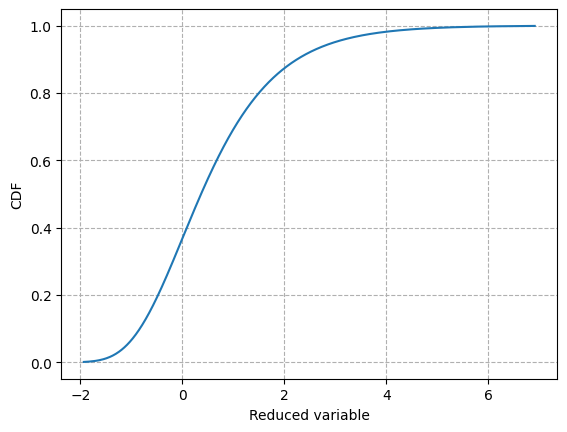

In [3]:
F = np.linspace(0, 1, 1001)
y = ev.calcRedVar(F)

fig, ax = plt.subplots()
ax.plot(y, F)
ax.set(xlabel="Reduced variable", ylabel="CDF")
ax.grid(ls='--')
plt.show()

## 2.2 Relación entre tamaño de característica microstructural y variable reducida

**Variable reducida:**

La variable reducida, $y$, se define como:

$$y = \frac{x - \lambda}{\delta}$$

donde:

- $x$: tamaño de la característica microestructural.

- $\lambda$: parámetro de locación de la Distribución (Gumbel) de Valores Extremos.

- $\delta$: parámetro de escala de la Distribución (Gumbel) de Valores Extremos.

**Relación lineal:**

Una vez que se hayan obtenido los mejores estimados para el parámetro de locación $(\lambda)$ y escala $(\delta)$, se puede estimar el tamaño máximo esperado de una característica microestructural, para una probabilidad dada, usando la ecuación:

$$x = \delta y + \lambda$$

o

$$x = \delta \left[-\ln\left(-\ln\left(P\right)\right)\right] + \lambda$$

Esto corresponde a la ecuación de una línea recta, en la que la pendiente está dada por el parámetro de escala $(\delta)$, y el intercepto está dado por el parámetro de locación $(\lambda)$.

## 2.3 Construcción de un gráfico de Gumbel

El desarrollo inicial del gráfico de Gumbel se llevó a cabo antes de la disponibilidad masiva de métodos computacionales. Es por eso, que esta herramienta era util para estimar mediante métodos gráficos los valores de los parámetros de la Distribución (Gumbel) de Valores Extremos. Al día de hoy, sirve como herramienta gráfica para verificar el buen ajuste de la distribución a los datos.

In [4]:
# Generación de datos para ejemplo
lam0, del0 = 40, 15
ns = 24
x_random = gumbel_r.rvs(loc=lam0, scale=del0, size=ns, random_state=random_state)

### 2.3.1 Construcción "a mano"

1. Procesar la serie de datos utilizando la Distribución Empírica:
    - Ordenar las mediciones de tamaño de característica microestructural, $x$, in orden ascendente.
    - Estimar los valores de la Distribución Empírica, $P$, para la serie de datos.
    - Estimar el valor de la variable reducida que corresponde a la Distribución empírica ajustada previamente: $y=-\ln\left(-\ln\left(P\right)\right)$.

In [5]:
# Ordenar las mediciones de tamaño de característica microestructural en order ascendente.
# Estimar los valores de la Distribución empírica, P, para la serie de datos
x_sorted, ecdf = ev.eCDF(x_random)

# Estimar el valor de la variable reducida que corresponde a la Distribución empírica ajustada previamente
y = ev.calcRedVar(ecdf)

2. Ajustar la Distribución (Gumbel) de Valores extremos a la serie de datos:
    - Utilizar el método de momentos o el método de máxima verosimilitud para obtener estimados de los parámetros de la distribución, $\delta$ y $\lambda$.
    - Obtener estimados de tamaños de la característica microestructural, $x_{MoM}$ o $x_{ML}$, para las probabilidad empíricas estimadas para la serie de datos, $P$.
    - Calcular intervalos de confianza. (error estándar)

In [6]:
# Estimación de parámetros de la distribución
lam_mom, del_mom = ev.fitEVmom(x_sorted, verbose=True) 
lam_ml, del_ml = ev.fitEVml(x_sorted, verbose=True)

# estimados de tamaños de característica microestructural
x_mom = del_mom * y + lam_mom
x_ml = del_ml * y + lam_mom

# cálculo de intervalos de confianza
se_mom = ev.calcSE(x_mom, lam_mom, del_mom)
se_ml = ev.calcSE(x_ml, lam_ml, del_ml)

Gumbel distribution params. (*MoM est.)
lambda: 37.3714
delta : 13.8761

Gumbel distribution params. (*ML est.)
lambda: 37.4882
delta : 13.0197



3. Graficar los datos
    - Variable reducida vs mediciones de característica microestructural, en orden ascendente: $y \, \text{vs} \, x$.
    - Distribución empírica linealizada vs estimados de tamaños $x_{MoM}$ o $x_{ML}$.
    - Intervalos de confianza

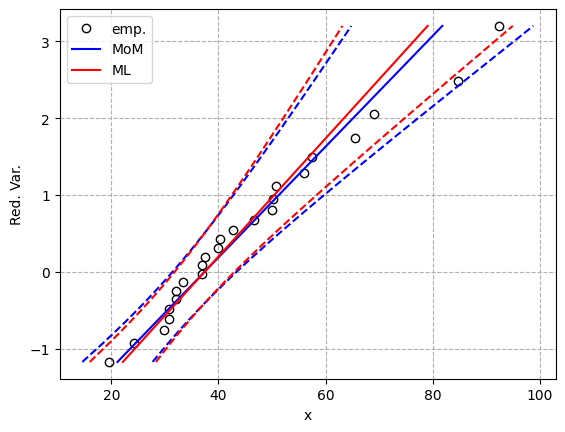

In [7]:
fig, ax = plt.subplots()
xs, ses = [x_mom, x_ml], [se_mom, se_ml]
cs, labs = ['b', 'r'], ["MoM", "ML"]

# Variable redudica vs mediciones de característica microestructural, en orden ascendente
ax.plot(x_sorted, y, ls='', marker='o', c='k', mfc="None", label="emp.")

# Distribución empírica linealizada vs estimados de tamaño x_MoM o X_ML
for x, c, lab in zip(xs, cs, labs): 
    ax.plot(x, y, ls='-', color=c, label=lab)

# Intervalos de confianza
for x, se, c in zip(xs, ses, cs):
    xmin, xmax = x-2.0*se, x+2.0*se
    ax.plot(xmin, y, ls='--', color=c)
    ax.plot(xmax, y, ls='--', color=c)

ax.set(xlabel="x", ylabel="Red. Var.")
ax.legend()
ax.grid(ls='--')
plt.show()

### 2.3.2 Construcción "automática"

Gumbel distribution params. (*MoM est.)
lambda: 37.3714
delta : 13.8761

Gumbel distribution params. (*ML est.)
lambda: 37.4882
delta : 13.0197



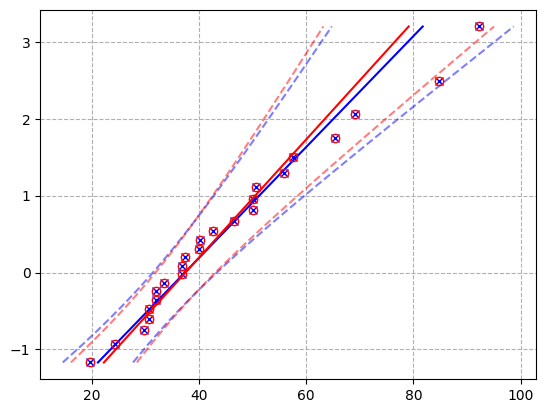

In [8]:
fig, ax = plt.subplots()
ev.gumbelPlot(ax, x_random, method="mom", marker="x", color='b', lab='MoM')
ev.gumbelPlot(ax, x_random, method="ml", marker='o', color='r', lab="ML")
plt.show()

# Referencias

**Artículos:**

[[Castro et al. 2015](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)]

Castro-Cedeño, E. I., Herrera-Trejo, M., Castro-Román, M., Castro-Uresti, F., & López-Cornejo, M. (2016).   
Evaluation of steel cleanliness in a steel deoxidized using Al.   
Metallurgical and Materials Transactions B, 47(3), 1613-1625.

[[Huazano et al. 2022]](https://doi.org/10.3390/ma15217681)

Huazano-Estrada, P., Herrera-Trejo, M., Castro-Román, M. d. J., & Ruiz-Mondragón, J. (2022).  
Characterization of Inclusion Size Distributions in Steel Wire Rods.  
Materials, 15(21), 7681.

**Documentación Scipy:**

[scipy.stats.gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html)


**Libros:**

[Y. Murakami, Metal Fatigue (2002)](https://www.sciencedirect.com/book/9780080440644/metal-fatigue)

[Y. Murakami, Metal Fatigue 2nd. ed (2019)](https://www.sciencedirect.com/book/9780128138762/metal-fatigue)



**Normas ASTM:**

[ASTM E2283: Standard Practice for Extreme Value Analysis of Nonmetallic Inclusions in Steel and Other Microstructural Features](https://www.astm.org/e2283-08r19.html)



**Web:**

[Gumbel Distribution](https://en.wikipedia.org/wiki/Gumbel_distribution)

[Extreme Value Type I Distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366g.htm)




